In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('datasets_701499_1226194_Restaurant names and Metadata.csv')
df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [3]:
df['Cost']

0        800
1        800
2      1,300
3        800
4      1,200
       ...  
100      600
101      200
102      500
103      250
104    1,700
Name: Cost, Length: 105, dtype: object

In [4]:
df['Cost'].apply(lambda x : float(x.replace(',','')))

0       800.0
1       800.0
2      1300.0
3       800.0
4      1200.0
        ...  
100     600.0
101     200.0
102     500.0
103     250.0
104    1700.0
Name: Cost, Length: 105, dtype: float64

In [5]:
df['Cost'] = df['Cost'].apply(lambda x : float(x.replace(',','')))

In [6]:
cost = df[['Name','Cost']]
cost

Name    Cost
0                           Beyond Flavours   800.0
1                                  Paradise   800.0
2                                  Flechazo  1300.0
3            Shah Ghouse Hotel & Restaurant   800.0
4                Over The Moon Brew Company  1200.0
..                                      ...     ...
100                               IndiBlaze   600.0
101                            Sweet Basket   200.0
102                        Angaara Counts 3   500.0
103                             Wich Please   250.0
104  Republic Of Noodles - Lemon Tree Hotel  1700.0

[105 rows x 2 columns]

In [7]:
pd.cut(cost['Cost'],bins=10)

0        (680.0, 945.0]
1        (680.0, 945.0]
2      (1210.0, 1475.0]
3        (680.0, 945.0]
4       (945.0, 1210.0]
             ...       
100      (415.0, 680.0]
101     (147.35, 415.0]
102      (415.0, 680.0]
103     (147.35, 415.0]
104    (1475.0, 1740.0]
Name: Cost, Length: 105, dtype: category
Categories (10, interval[float64]): [(147.35, 415.0] < (415.0, 680.0] < (680.0, 945.0] < (945.0, 1210.0] ... (1740.0, 2005.0] < (2005.0, 2270.0] < (2270.0, 2535.0] < (2535.0, 2800.0]]

In [8]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise')
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
        * sequence of scal

In [9]:
bins = pd.DataFrame(pd.cut(cost['Cost'],bins=10))
bins

Cost
0      (680.0, 945.0]
1      (680.0, 945.0]
2    (1210.0, 1475.0]
3      (680.0, 945.0]
4     (945.0, 1210.0]
..                ...
100    (415.0, 680.0]
101   (147.35, 415.0]
102    (415.0, 680.0]
103   (147.35, 415.0]
104  (1475.0, 1740.0]

[105 rows x 1 columns]

In [10]:
bins.columns = ['bins']
bins

bins
0      (680.0, 945.0]
1      (680.0, 945.0]
2    (1210.0, 1475.0]
3      (680.0, 945.0]
4     (945.0, 1210.0]
..                ...
100    (415.0, 680.0]
101   (147.35, 415.0]
102    (415.0, 680.0]
103   (147.35, 415.0]
104  (1475.0, 1740.0]

[105 rows x 1 columns]

In [11]:
bins['bins'] = bins['bins'].astype(str)
bins['bins']

0        (680.0, 945.0]
1        (680.0, 945.0]
2      (1210.0, 1475.0]
3        (680.0, 945.0]
4       (945.0, 1210.0]
             ...       
100      (415.0, 680.0]
101     (147.35, 415.0]
102      (415.0, 680.0]
103     (147.35, 415.0]
104    (1475.0, 1740.0]
Name: bins, Length: 105, dtype: object

In [12]:
bins = bins['bins'].value_counts().reset_index()
bins

index  bins
0    (415.0, 680.0]    29
1    (680.0, 945.0]    20
2   (147.35, 415.0]    18
3   (945.0, 1210.0]    16
4  (1475.0, 1740.0]    10
5  (1210.0, 1475.0]     6
6  (1740.0, 2005.0]     4
7  (2270.0, 2535.0]     1
8  (2535.0, 2800.0]     1

In [13]:
bins.columns = ['Bins','Count']
bins['Cumsum'] = bins['Count'].cumsum()
bins

Bins  Count  Cumsum
0    (415.0, 680.0]     29      29
1    (680.0, 945.0]     20      49
2   (147.35, 415.0]     18      67
3   (945.0, 1210.0]     16      83
4  (1475.0, 1740.0]     10      93
5  (1210.0, 1475.0]      6      99
6  (1740.0, 2005.0]      4     103
7  (2270.0, 2535.0]      1     104
8  (2535.0, 2800.0]      1     105

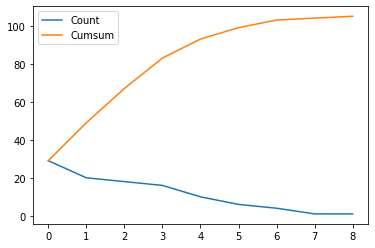

In [14]:
bins.plot()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

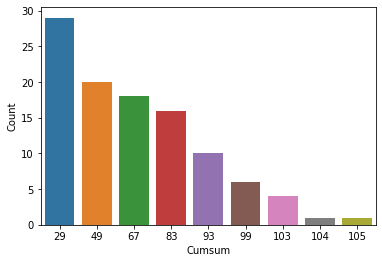

In [16]:
sns.barplot(bins['Cumsum'],bins['Count'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

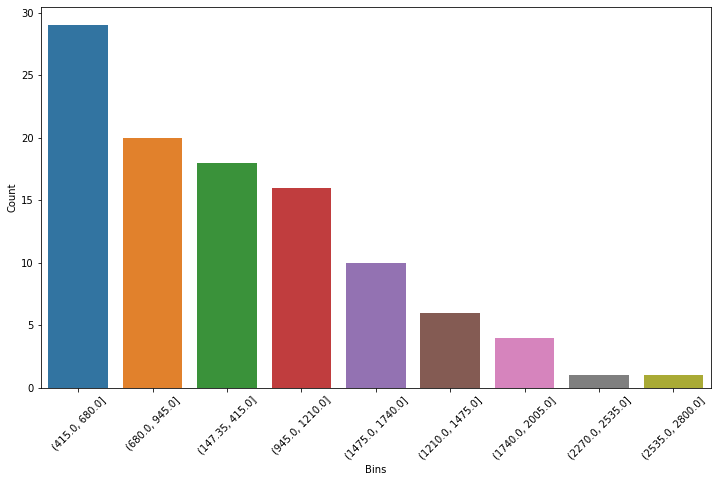

In [17]:
plt.figure(figsize=(12,7))
sns.barplot(bins['Bins'],bins['Count'])
plt.xticks(rotation=45)

In [18]:
cuisines = df['Cuisines']
cuisines = cuisines.apply(lambda x : x.lower())
cuisines

0      chinese, continental, kebab, european, south i...
1                         biryani, north indian, chinese
2           asian, mediterranean, north indian, desserts
3      biryani, north indian, chinese, seafood, bever...
4      asian, continental, north indian, chinese, med...
                             ...                        
100                                     fast food, salad
101                                       bakery, mithai
102                       north indian, biryani, chinese
103                                            fast food
104                      thai, asian, chinese, malaysian
Name: Cuisines, Length: 105, dtype: object

In [19]:
df['Cuisines']

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [20]:
', '.join(i for i in cuisines.tolist())

'chinese, continental, kebab, european, south indian, north indian, biryani, north indian, chinese, asian, mediterranean, north indian, desserts, biryani, north indian, chinese, seafood, beverages, asian, continental, north indian, chinese, mediterranean, seafood, goan, north indian, continental, asian, healthy food, north indian, continental, south indian, lebanese, american, chinese, north indian, kebab, south indian, ice cream, desserts, street food, north indian, fast food, mediterranean, north indian, kebab, bbq, continental, american, chinese, north indian, italian, finger food, european, mediterranean, north indian, burger, fast food, north indian, chinese, north indian, north indian, chinese, continental, north indian, chinese, biryani, north indian, north indian, japanese, italian, salad, sushi, american, ice cream, desserts, north indian, chinese, continental, continental, mexican, italian, north indian, chinese, salad, north indian, mediterranean, european, mughlai, biryani,

In [21]:
','.join(i for i in cuisines.tolist())

'chinese, continental, kebab, european, south indian, north indian,biryani, north indian, chinese,asian, mediterranean, north indian, desserts,biryani, north indian, chinese, seafood, beverages,asian, continental, north indian, chinese, mediterranean,seafood, goan, north indian, continental, asian,healthy food, north indian, continental, south indian,lebanese,american, chinese, north indian, kebab, south indian,ice cream, desserts,street food, north indian, fast food,mediterranean, north indian, kebab, bbq,continental, american, chinese,north indian, italian, finger food,european, mediterranean, north indian,burger, fast food,north indian,chinese, north indian,north indian, chinese, continental,north indian, chinese, biryani,north indian,north indian, japanese, italian, salad, sushi,american,ice cream, desserts,north indian, chinese, continental,continental,mexican, italian, north indian, chinese, salad,north indian, mediterranean, european,mughlai, biryani,fast food,andhra, south indi

In [22]:
all_cuisines = ', '.join(i for i in cuisines.tolist())

In [23]:
from collections import Counter

In [24]:
#Counter(all_cuisines.split(', '))

In [25]:
#Counter(all_cuisines.split(','))

In [26]:
all_cuisines = Counter(all_cuisines.split(', '))
all_cuisines

Counter({'chinese': 43,
         'continental': 21,
         'kebab': 6,
         'european': 4,
         'south indian': 9,
         'north indian': 61,
         'biryani': 16,
         'asian': 15,
         'mediterranean': 5,
         'desserts': 13,
         'seafood': 4,
         'beverages': 5,
         'goan': 1,
         'healthy food': 1,
         'lebanese': 1,
         'american': 6,
         'ice cream': 2,
         'street food': 2,
         'fast food': 15,
         'bbq': 2,
         'italian': 14,
         'finger food': 2,
         'burger': 5,
         'japanese': 2,
         'salad': 5,
         'sushi': 4,
         'mexican': 1,
         'mughlai': 6,
         'andhra': 6,
         'bakery': 7,
         'juices': 1,
         'arabian': 2,
         'hyderabadi': 4,
         'cafe': 6,
         'spanish': 1,
         'wraps': 1,
         'thai': 3,
         'indonesian': 1,
         'modern indian': 2,
         'momos': 4,
         'pizza': 1,
         'north eastern'

In [27]:
all_cuisines = pd.DataFrame.from_dict(all_cuisines,orient='index',dtype='int')
all_cuisines

0
chinese        43
continental    21
kebab           6
european        4
south indian    9
north indian   61
biryani        16
asian          15
mediterranean   5
desserts       13
seafood         4
beverages       5
goan            1
healthy food    1
lebanese        1
american        6
ice cream       2
street food     2
fast food      15
bbq             2
italian        14
finger food     2
burger          5
japanese        2
salad           5
sushi           4
mexican         1
mughlai         6
andhra          6
bakery          7
juices          1
arabian         2
hyderabadi      4
cafe            6
spanish         1
wraps           1
thai            3
indonesian      1
modern indian   2
momos           4
pizza           1
north eastern   1
mithai          1
malaysian       1

In [28]:
df['Cuisines']

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [29]:
all_cuisines.columns = ['No of Restaurants']
all_cuisines.sort_values(by='No of Restaurants',ascending=False,inplace=True)

In [30]:
all_cuisines

No of Restaurants
north indian                  61
chinese                       43
continental                   21
biryani                       16
fast food                     15
asian                         15
italian                       14
desserts                      13
south indian                   9
bakery                         7
kebab                          6
cafe                           6
andhra                         6
mughlai                        6
american                       6
salad                          5
burger                         5
mediterranean                  5
beverages                      5
momos                          4
seafood                        4
european                       4
hyderabadi                     4
sushi                          4
thai                           3
modern indian                  2
arabian                        2
ice cream                      2
street food                    2
japanese                       2
finger food                    2
bbq                            2
pizza                          1
north eastern                  1
mithai                         1
indonesian                     1
juices                         1
wraps                          1
spanish                        1
mexican                        1
goan                           1
healthy food                   1
lebanese                       1
malaysian                      1

In [31]:
cuisines = cuisines.apply(lambda x : x.split(', '))
cuisines = pd.DataFrame(cuisines)
cuisines

Cuisines
0    [chinese, continental, kebab, european, south ...
1                     [biryani, north indian, chinese]
2       [asian, mediterranean, north indian, desserts]
3    [biryani, north indian, chinese, seafood, beve...
4    [asian, continental, north indian, chinese, me...
..                                                 ...
100                                 [fast food, salad]
101                                   [bakery, mithai]
102                   [north indian, biryani, chinese]
103                                        [fast food]
104                  [thai, asian, chinese, malaysian]

[105 rows x 1 columns]

In [32]:
for i in all_cuisines.index.tolist():
    cuisines['{}'.format(i)] = cuisines['Cuisines'].apply(lambda x : i in x)

In [33]:
cuisines

Cuisines  north indian  chinese  \
0    [chinese, continental, kebab, european, south ...          True     True   
1                     [biryani, north indian, chinese]          True     True   
2       [asian, mediterranean, north indian, desserts]          True    False   
3    [biryani, north indian, chinese, seafood, beve...          True     True   
4    [asian, continental, north indian, chinese, me...          True     True   
..                                                 ...           ...      ...   
100                                 [fast food, salad]         False    False   
101                                   [bakery, mithai]         False    False   
102                   [north indian, biryani, chinese]          True     True   
103                                        [fast food]         False    False   
104                  [thai, asian, chinese, malaysian]         False     True   

     continental  biryani  fast food  asian  italian  desserts  south indian  \
0           True    False      False  False    False     False          True   
1          False     True      False  False    False     False         False   
2          False    False      False   True    False      True         False   
3          False     True      False  False    False     False         False   
4           True    False      False   True    False     False         False   
..           ...      ...        ...    ...      ...       ...           ...   
100        False    False       True  False    False     False         False   
101        False    False      False  False    False     False         False   
102        False     True      False  False    False     False         False   
103        False    False       True  False    False     False         False   
104        False    False      False   True    False     False         False   

     ...  mithai  indonesian  juices  wraps  spanish  mexican   goan  \
0    ...   False       False   False  False    False    False  False   
1    ...   False       False   False  False    False    False  False   
2    ...   False       False   False  False    False    False  False   
3    ...   False       False   False  False    False    False  False   
4    ...   False       False   False  False    False    False  False   
..   ...     ...         ...     ...    ...      ...      ...    ...   
100  ...   False       False   False  False    False    False  False   
101  ...    True       False   False  False    False    False  False   
102  ...   False       False   False  False    False    False  False   
103  ...   False       False   False  False    False    False  False   
104  ...   False       False   False  False    False    False  False   

     healthy food  lebanese  malaysian  
0           False     False      False  
1           False     False      False  
2           False     False      False  
3           False     False      False  
4           False     False      False  
..            ...       ...        ...  
100         False     False      False  
101         False     False      False  
102         False     False      False  
103         False     False      False  
104         False     False       True  

[105 rows x 45 columns]

In [34]:
cuisines.drop('Cuisines',axis=1,inplace=True)

In [35]:
cuisines

north indian  chinese  continental  biryani  fast food  asian  italian  \
0            True     True         True    False      False  False    False   
1            True     True        False     True      False  False    False   
2            True    False        False    False      False   True    False   
3            True     True        False     True      False  False    False   
4            True     True         True    False      False   True    False   
..            ...      ...          ...      ...        ...    ...      ...   
100         False    False        False    False       True  False    False   
101         False    False        False    False      False  False    False   
102          True     True        False     True      False  False    False   
103         False    False        False    False       True  False    False   
104         False     True        False    False      False   True    False   

     desserts  south indian  bakery  ...  mithai  indonesian  juices  wraps  \
0       False          True   False  ...   False       False   False  False   
1       False         False   False  ...   False       False   False  False   
2        True         False   False  ...   False       False   False  False   
3       False         False   False  ...   False       False   False  False   
4       False         False   False  ...   False       False   False  False   
..        ...           ...     ...  ...     ...         ...     ...    ...   
100     False         False   False  ...   False       False   False  False   
101     False         False    True  ...    True       False   False  False   
102     False         False   False  ...   False       False   False  False   
103     False         False   False  ...   False       False   False  False   
104     False         False   False  ...   False       False   False  False   

     spanish  mexican   goan  healthy food  lebanese  malaysian  
0      False    False  False         False     False      False  
1      False    False  False         False     False      False  
2      False    False  False         False     False      False  
3      False    False  False         False     False      False  
4      False    False  False         False     False      False  
..       ...      ...    ...           ...       ...        ...  
100    False    False  False         False     False      False  
101    False    False  False         False     False      False  
102    False    False  False         False     False      False  
103    False    False  False         False     False      False  
104    False    False  False         False     False       True  

[105 rows x 44 columns]

In [36]:
df.drop(['Links'],axis=1,inplace=True)

In [37]:
cuisines = pd.concat([df,cuisines],axis=1)
cuisines

Name    Cost  \
0                           Beyond Flavours   800.0   
1                                  Paradise   800.0   
2                                  Flechazo  1300.0   
3            Shah Ghouse Hotel & Restaurant   800.0   
4                Over The Moon Brew Company  1200.0   
..                                      ...     ...   
100                               IndiBlaze   600.0   
101                            Sweet Basket   200.0   
102                        Angaara Counts 3   500.0   
103                             Wich Please   250.0   
104  Republic Of Noodles - Lemon Tree Hotel  1700.0   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  north indian  chinese  \
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)          True     True   
1                                       11 AM to 11 PM          True     True   
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM          True    False   
3                                      12 Noon to 2 AM          True     True   
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...          True     True   
..                                                 ...           ...      ...   
100                                     11 AM to 11 PM         False    False   
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...         False    False   
102                                   12 Noon to 11 PM          True     True   
103                           8am to 12:30AM (Mon-Sun)         False    False   
104              11:30 AM to 3 PM, 7 PM to 12 Midnight         False     True   

     continental  biryani  fast food  ...  mithai  indonesian  juices  wraps  \
0           True    False      False  ...   False       False   False  False   
1          False     True      False  ...   False       False   False  False   
2          False    False      False  ...   False       False   False  False   
3          False     True      False  ...   False       False   False  False   
4           True    False      False  ...   False       False   False  False   
..           ...      ...        ...  ...     ...         ...     ...    ...   
100        False    False       True  ...   False       False   False  False   
101        False    False      False  ...    True       False   False  False   
102        False     True      False  ...   False       False   False  False   
103        False    False       True  ...   False       False   False  False   
104        False    False      False  ...   False       False   False  False   

     spanish  mexican   goan  healthy food  lebane

In [38]:
cuisines.drop(['Collections','Cuisines','Timings'],axis=1,inplace=True)
cuisines

Name    Cost  north indian  chinese  \
0                           Beyond Flavours   800.0          True     True   
1                                  Paradise   800.0          True     True   
2                                  Flechazo  1300.0          True    False   
3            Shah Ghouse Hotel & Restaurant   800.0          True     True   
4                Over The Moon Brew Company  1200.0          True     True   
..                                      ...     ...           ...      ...   
100                               IndiBlaze   600.0         False    False   
101                            Sweet Basket   200.0         False    False   
102                        Angaara Counts 3   500.0          True     True   
103                             Wich Please   250.0         False    False   
104  Republic Of Noodles - Lemon Tree Hotel  1700.0         False     True   

     continental  biryani  fast food  asian  italian  desserts  ...  mithai  \
0           True    False      False  False    False     False  ...   False   
1          False     True      False  False    False     False  ...   False   
2          False    False      False   True    False      True  ...   False   
3          False     True      False  False    False     False  ...   False   
4           True    False      False   True    False     False  ...   False   
..           ...      ...        ...    ...      ...       ...  ...     ...   
100        False    False       True  False    False     False  ...   False   
101        False    False      False  False    False     False  ...    True   
102        False     True      False  False    False     False  ...   False   
103        False    False       True  False    False     False  ...   False   
104        False    False      False   True    False     False  ...   False   

     indonesian  juices  wraps  spanish  mexican   goan  healthy food  \
0         False   False  False    False    False  False         False   
1         False   False  False    False    False  False         False   
2         False   False  False    False    False  False         False   
3         False   False  False    False    False  False         False   
4         False   False  False    False    False  False         False   
..          ...     ...    ...      ...      ...    ...           ...   
100       False   False  False    False    False  False         False   
101       False   False  False    False    False  False         False   
102       False   False  False    False    False  False         False   
103       False   False  False    False    False  False         False   
104       False   False  False    False    False  False         False   

     lebanese  malaysian  
0       False      False  
1       False      False  
2       False      False  
3       False      False  
4       False      False  
..        ...        ...  
100     False      False  
101     False      False  
102     False      False  
103     False      False  
104     False       True  

[105 rows x 46 columns]

In [39]:
cuisines = pd.melt(cuisines,id_vars=['Name','Cost'],var_name='Cuisines')
cuisines = cuisines[cuisines['value']]
cuisines.drop(['value'],axis=1,inplace=True)
del all_cuisines

In [40]:
cuisines

Name    Cost      Cuisines
0                            Beyond Flavours   800.0  north indian
1                                   Paradise   800.0  north indian
2                                   Flechazo  1300.0  north indian
3             Shah Ghouse Hotel & Restaurant   800.0  north indian
4                 Over The Moon Brew Company  1200.0  north indian
...                                      ...     ...           ...
4121                  Mustang Terrace Lounge  1300.0       mexican
4205                   The Fisherman's Wharf  1500.0          goan
4311                                 eat.fit   500.0  healthy food
4417                Shah Ghouse Spl Shawarma   300.0      lebanese
4619  Republic Of Noodles - Lemon Tree Hotel  1700.0     malaysian

[313 rows x 3 columns]

In [41]:
df

Name    Cost  \
0                           Beyond Flavours   800.0   
1                                  Paradise   800.0   
2                                  Flechazo  1300.0   
3            Shah Ghouse Hotel & Restaurant   800.0   
4                Over The Moon Brew Company  1200.0   
..                                      ...     ...   
100                               IndiBlaze   600.0   
101                            Sweet Basket   200.0   
102                        Angaara Counts 3   500.0   
103                             Wich Please   250.0   
104  Republic Of Noodles - Lemon Tree Hotel  1700.0   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                       11 AM to 11 PM  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                      12 Noon to 2 AM  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  
..                                                 ...  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight  

[105 rows x 5 columns]

In [42]:
temps = cuisines['Cuisines'].value_counts().reset_index()
temps

index  Cuisines
0    north indian        61
1         chinese        43
2     continental        21
3         biryani        16
4           asian        15
5       fast food        15
6         italian        14
7        desserts        13
8    south indian         9
9          bakery         7
10        mughlai         6
11          kebab         6
12           cafe         6
13       american         6
14         andhra         6
15  mediterranean         5
16          salad         5
17         burger         5
18      beverages         5
19     hyderabadi         4
20        seafood         4
21          momos         4
22       european         4
23          sushi         4
24           thai         3
25    street food         2
26  modern indian         2
27            bbq         2
28    finger food         2
29       japanese         2
30      ice cream         2
31        arabian         2
32        mexican         1
33       lebanese         1
34        spanish         1
35         mithai         1
36   healthy food         1
37      malaysian         1
38  north eastern         1
39          wraps         1
40     indonesian         1
41         juices         1
42          pizza         1
43           goan         1

In [43]:
from plotly.offline import init_notebook_mode,download_plotlyjs,iplot,plot

In [44]:
init_notebook_mode(connected=True)

In [45]:
import cufflinks as cf

In [46]:
cf.go_offline()

In [47]:
temps.columns

Index(['index', 'Cuisines'], dtype='object')

In [48]:
temps.iplot(kind='bar',x='index',y='Cuisines')

In [50]:
cuisines['Cuisines'].value_counts().reset_index()

index  Cuisines
0    north indian        61
1         chinese        43
2     continental        21
3         biryani        16
4           asian        15
5       fast food        15
6         italian        14
7        desserts        13
8    south indian         9
9          bakery         7
10        mughlai         6
11          kebab         6
12           cafe         6
13       american         6
14         andhra         6
15  mediterranean         5
16          salad         5
17         burger         5
18      beverages         5
19     hyderabadi         4
20        seafood         4
21          momos         4
22       european         4
23          sushi         4
24           thai         3
25    street food         2
26  modern indian         2
27            bbq         2
28    finger food         2
29       japanese         2
30      ice cream         2
31        arabian         2
32        mexican         1
33       lebanese         1
34        spanish         1
35         mithai         1
36   healthy food         1
37      malaysian         1
38  north eastern         1
39          wraps         1
40     indonesian         1
41         juices         1
42          pizza         1
43           goan         1

In [51]:
#sns.barplot(temps['index'],temps['Cuisines'])
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud

In [52]:
fig = px.bar(x = temps['index'], y=temps['Cuisines'])
fig.update_layout(title = "Cuisines availability",
                 xaxis_title = "Cusisine",
                 yaxis_title = "No of restaurants cuisine available at")
fig.show()

In [53]:
top_cuisines = cuisines['Cuisines'].value_counts().reset_index()
top_cuisines

index  Cuisines
0    north indian        61
1         chinese        43
2     continental        21
3         biryani        16
4           asian        15
5       fast food        15
6         italian        14
7        desserts        13
8    south indian         9
9          bakery         7
10        mughlai         6
11          kebab         6
12           cafe         6
13       american         6
14         andhra         6
15  mediterranean         5
16          salad         5
17         burger         5
18      beverages         5
19     hyderabadi         4
20        seafood         4
21          momos         4
22       european         4
23          sushi         4
24           thai         3
25    street food         2
26  modern indian         2
27            bbq         2
28    finger food         2
29       japanese         2
30      ice cream         2
31        arabian         2
32        mexican         1
33       lebanese         1
34        spanish         1
35         mithai         1
36   healthy food         1
37      malaysian         1
38  north eastern         1
39          wraps         1
40     indonesian         1
41         juices         1
42          pizza         1
43           goan         1

In [54]:
top_cuisines = top_cuisines['index'].tolist()[:8]
top_cuisines

['north indian',
 'chinese',
 'continental',
 'biryani',
 'asian',
 'fast food',
 'italian',
 'desserts']

In [55]:
cuisines[cuisines['Cuisines'].isin(top_cuisines)]

Name    Cost      Cuisines
0                   Beyond Flavours   800.0  north indian
1                          Paradise   800.0  north indian
2                          Flechazo  1300.0  north indian
3    Shah Ghouse Hotel & Restaurant   800.0  north indian
4        Over The Moon Brew Company  1200.0  north indian
..                              ...     ...           ...
794                       KS Bakers   200.0      desserts
807                         Labonel  1000.0      desserts
809                          Faasos   600.0      desserts
821              The Chocolate Room   600.0      desserts
829                  Dunkin' Donuts   550.0      desserts

[198 rows x 3 columns]

In [56]:
cuisines['Cuisines'].isin(top_cuisines)

0        True
1        True
2        True
3        True
4        True
        ...  
4121    False
4205    False
4311    False
4417    False
4619    False
Name: Cuisines, Length: 313, dtype: bool

In [57]:
temp = cuisines[cuisines['Cuisines'].isin(top_cuisines)]

In [58]:
temp = temp.sort_values(by='Cost')

In [59]:
temp

Name    Cost      Cuisines
758                                  Amul   150.0      desserts
579                        Asian Meal Box   200.0         asian
794                             KS Bakers   200.0      desserts
449                    Hunger Maggi Point   200.0     fast food
479                             KS Bakers   200.0     fast food
..                                    ...     ...           ...
302  Collage - Hyatt Hyderabad Gachibowli  2800.0   continental
92   Collage - Hyatt Hyderabad Gachibowli  2800.0  north indian
722  Collage - Hyatt Hyderabad Gachibowli  2800.0       italian
617  Collage - Hyatt Hyderabad Gachibowli  2800.0         asian
197  Collage - Hyatt Hyderabad Gachibowli  2800.0       chinese

[198 rows x 3 columns]

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

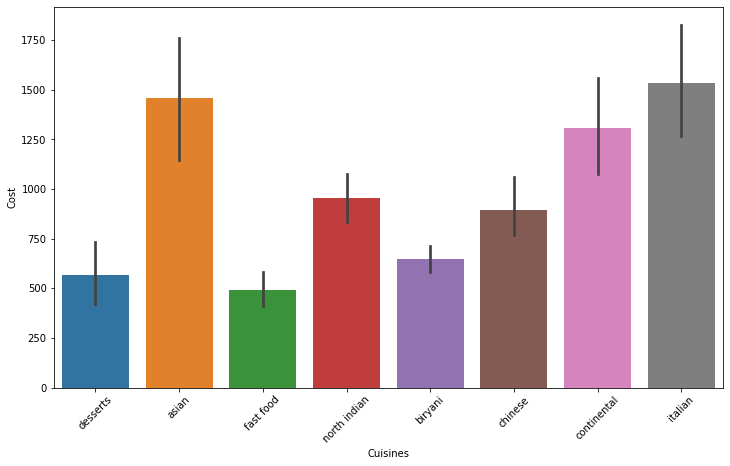

In [60]:
plt.figure(figsize=(12,7))
sns.barplot(x='Cuisines',y='Cost',data=temp)
plt.xticks(rotation=45)

In [61]:
temp.iplot(x='Cuisines',y='Cost',kind='bar')

In [62]:
mean_most = cuisines.groupby('Cuisines')['Cost'].mean().reset_index()
mean_most

Cuisines         Cost
0        american   825.000000
1          andhra   850.000000
2         arabian   425.000000
3           asian  1460.000000
4          bakery   564.285714
5             bbq  1550.000000
6       beverages   720.000000
7         biryani   650.000000
8          burger   530.000000
9            cafe   625.000000
10        chinese   895.348837
11    continental  1307.142857
12       desserts   569.230769
13       european  1150.000000
14      fast food   493.333333
15    finger food  1150.000000
16           goan  1500.000000
17   healthy food   500.000000
18     hyderabadi   762.500000
19      ice cream   250.000000
20     indonesian   800.000000
21        italian  1532.142857
22       japanese  1700.000000
23         juices  1000.000000
24          kebab  1016.666667
25       lebanese   300.000000
26      malaysian  1700.000000
27  mediterranean  1340.000000
28        mexican  1300.000000
29         mithai   200.000000
30  modern indian  2000.000000
31          momos   675.000000
32        mughlai   891.666667
33  north eastern   550.000000
34   north indian   955.737705
35          pizza   400.000000
36          salad  1010.000000
37        seafood  1012.500000
38   south indian   811.111111
39        spanish  1200.000000
40    street food   275.000000
41          sushi  1562.500000
42           thai  1200.000000
43          wraps   500.000000

In [63]:
mean_most.sort_values('Cost',ascending=False,inplace=True)

In [64]:
mean_most

Cuisines         Cost
30  modern indian  2000.000000
22       japanese  1700.000000
26      malaysian  1700.000000
41          sushi  1562.500000
5             bbq  1550.000000
21        italian  1532.142857
16           goan  1500.000000
3           asian  1460.000000
27  mediterranean  1340.000000
11    continental  1307.142857
28        mexican  1300.000000
39        spanish  1200.000000
42           thai  1200.000000
13       european  1150.000000
15    finger food  1150.000000
24          kebab  1016.666667
37        seafood  1012.500000
36          salad  1010.000000
23         juices  1000.000000
34   north indian   955.737705
10        chinese   895.348837
32        mughlai   891.666667
1          andhra   850.000000
0        american   825.000000
38   south indian   811.111111
20     indonesian   800.000000
18     hyderabadi   762.500000
6       beverages   720.000000
31          momos   675.000000
7         biryani   650.000000
9            cafe   625.000000
12       desserts   569.230769
4          bakery   564.285714
33  north eastern   550.000000
8          burger   530.000000
17   healthy food   500.000000
43          wraps   500.000000
14      fast food   493.333333
2         arabian   425.000000
35          pizza   400.000000
25       lebanese   300.000000
40    street food   275.000000
19      ice cream   250.000000
29         mithai   200.000000

In [65]:
mean_most.iplot(kind='bar',x='Cuisines',y='Cost',colors='black')

In [66]:
cuisines_offered = cuisines.groupby('Name')['Cuisines'].count().reset_index()
cuisines_offered

Name  Cuisines
0                        10 Downing Street         3
1                                 13 Dhaba         1
2           3B's - Buddies, Bar & Barbecue         3
3                AB's - Absolute Barbecues         3
4                        Absolute Sizzlers         3
..                                     ...       ...
100                            Wich Please         1
101  Yum Yum Tree - The Arabian Food Court         2
102        Zega - Sheraton Hyderabad Hotel         2
103               Zing's Northeast Kitchen         2
104                                eat.fit         4

[105 rows x 2 columns]

In [67]:
df = pd.merge(df,cuisines_offered,left_on='Name',right_on='Name')
del cuisines_offered
df

Name    Cost  \
0                           Beyond Flavours   800.0   
1                                  Paradise   800.0   
2                                  Flechazo  1300.0   
3            Shah Ghouse Hotel & Restaurant   800.0   
4                Over The Moon Brew Company  1200.0   
..                                      ...     ...   
100                               IndiBlaze   600.0   
101                            Sweet Basket   200.0   
102                        Angaara Counts 3   500.0   
103                             Wich Please   250.0   
104  Republic Of Noodles - Lemon Tree Hotel  1700.0   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                            Cuisines_x  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  Cuisines_y  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)           6  
1                                       11 AM to 11 PM           3  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM           4  
3                                      12 Noon to 2 AM           5  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...           5  
..                                                 ...         ...  
100                                     11 AM to 11 PM           2  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...           2  
102                                   12 Noon to 11 PM           3  
103                           8am to 12:30AM (Mon-Sun)           1  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight           4  

[105 rows x 6 columns]

In [68]:
df['Cuisines_x'][1]

'Biryani, North Indian, Chinese'

In [69]:
reviews = pd.read_csv('Restaurant reviews.csv')
reviews

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                                                 ...    ...   
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
0           1 Review , 2 Followers  5/25/2019 15:54         0  
1          3 Reviews , 2 Followers  5/25/2019 14:20         0  
2          2 Reviews , 3 Followers  5/24/2019 22:54         0  
3            1 Review , 1 Follower  5/24/2019 22:11         0  
4          3 Reviews , 2 Followers  5/24/2019 21:37         0  
...                            ...              ...       ...  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6  

[10000 rows x 7 columns]

In [70]:
df.isnull().sum()

Name            0
Cost            0
Collections    54
Cuisines_x      0
Timings         1
Cuisines_y      0
dtype: int64

In [71]:
reviews.shape

(10000, 7)

In [72]:
reviews[reviews['Reviewer'].isnull()]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8777  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9085         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

In [73]:
temp = reviews[reviews['Reviewer'].isnull()]['Restaurant'].unique()

In [74]:
reviews.dropna(inplace=True)

In [75]:
reviews.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [76]:
reviews['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [77]:
reviews['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [78]:
reviews[reviews['Rating']=='Like']['Rating'] = 3.5

In [79]:
reviews.loc[reviews['Rating']=='Like']['Rating'] = 3.5

In [80]:
reviews[reviews['Rating']=='Like']['Rating']

7601    Like
Name: Rating, dtype: object

In [81]:
reviews.loc[reviews['Rating']=='Like','Rating'] = 3.5

In [82]:
reviews.loc[reviews['Rating']=='Like']['Rating']

Series([], Name: Rating, dtype: object)

In [83]:
reviews.loc[reviews['Rating']=='Like']

Empty DataFrame
Columns: [Restaurant, Reviewer, Review, Rating, Metadata, Time, Pictures]
Index: []

In [84]:
reviews['Rating']= reviews['Rating'].astype('float')

In [85]:
def get_followers(x):
    x = x.split(', ')
    try :
        x = x[1].split()[0]
    except:
        x = 0
    return x

In [86]:
df

Name    Cost  \
0                           Beyond Flavours   800.0   
1                                  Paradise   800.0   
2                                  Flechazo  1300.0   
3            Shah Ghouse Hotel & Restaurant   800.0   
4                Over The Moon Brew Company  1200.0   
..                                      ...     ...   
100                               IndiBlaze   600.0   
101                            Sweet Basket   200.0   
102                        Angaara Counts 3   500.0   
103                             Wich Please   250.0   
104  Republic Of Noodles - Lemon Tree Hotel  1700.0   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                            Cuisines_x  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  Cuisines_y  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)           6  
1                                       11 AM to 11 PM           3  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM           4  
3                                      12 Noon to 2 AM           5  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...           5  
..                                                 ...         ...  
100                                     11 AM to 11 PM           2  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...           2  
102                                   12 Noon to 11 PM           3  
103                           8am to 12:30AM (Mon-Sun)           1  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight           4  

[105 rows x 6 columns]

In [87]:
reviews['Thread Review'] = reviews['Metadata'].apply(lambda x : x.split(',')[0].split()[0])

In [88]:
reviews['Thread Review']

0         1
1         3
2         2
3         1
4         3
       ... 
9995     53
9996      2
9997     65
9998     13
9999    472
Name: Thread Review, Length: 9955, dtype: object

In [89]:
reviews['Metadata']

0             1 Review , 2 Followers
1            3 Reviews , 2 Followers
2            2 Reviews , 3 Followers
3              1 Review , 1 Follower
4            3 Reviews , 2 Followers
                    ...             
9995       53 Reviews , 54 Followers
9996        2 Reviews , 53 Followers
9997      65 Reviews , 423 Followers
9998      13 Reviews , 144 Followers
9999    472 Reviews , 1302 Followers
Name: Metadata, Length: 9955, dtype: object

In [90]:
reviews['Followers'] = reviews['Metadata'].apply(get_followers)
reviews['Followers']

0          2
1          2
2          3
3          1
4          2
        ... 
9995      54
9996      53
9997     423
9998     144
9999    1302
Name: Followers, Length: 9955, dtype: object

In [91]:
reviews['Followers'] = reviews['Followers'].astype('int')
reviews.drop(['Metadata'],axis=1,inplace=True)

In [92]:
reviews['Time'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))

NameError: name 'datetime' is not defined

In [93]:
from datetime import datetime

In [94]:
reviews['Time']

0       5/25/2019 15:54
1       5/25/2019 14:20
2       5/24/2019 22:54
3       5/24/2019 22:11
4       5/24/2019 21:37
             ...       
9995      6/5/2016 0:08
9996     6/4/2016 22:01
9997     6/3/2016 10:37
9998    5/31/2016 17:22
9999    5/31/2016 16:41
Name: Time, Length: 9955, dtype: object

In [95]:
reviews['Time'] = pd.to_datetime(reviews['Time'])

In [96]:
df['Name'].tolist()

['Beyond Flavours',
 'Paradise',
 'Flechazo',
 'Shah Ghouse Hotel & Restaurant',
 'Over The Moon Brew Company',
 "The Fisherman's Wharf",
 'eat.fit',
 'Shah Ghouse Spl Shawarma',
 'Hyper Local',
 'Cream Stone',
 "Sardarji's Chaats & More",
 'Barbeque Nation',
 'Absolute Sizzlers',
 'The Lal Street - Bar Exchange',
 "AB's - Absolute Barbecues",
 'KFC',
 'NorFest - The Dhaba',
 'Hotel Zara Hi-Fi',
 '10 Downing Street',
 'Pakwaan Grand',
 '13 Dhaba',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'B-Dubs',
 'Amul',
 'SKYHY',
 'Tiki Shack',
 'Mustang Terrace Lounge',
 "3B's - Buddies, Bar & Barbecue",
 'Behrouz Biryani',
 'Hunger Maggi Point',
 'Pot Pourri',
 'Pista House',
 'Marsala Food Company',
 'Club Rogue',
 'Mazzo - Marriott Executive Apartments',
 'Green Bawarchi Restaurant',
 'Banana Leaf Multicuisine Restaurant',
 'Kritunga Restaurant',
 'The Glass Onion',
 'Deli 9 Bistro',
 'Frio Bistro',
 'Karachi Bakery',
 'Karachi Cafe',
 'The Foodie Monster Kitchen',
 'La La Land - B

In [97]:
set(df['Name'].tolist())

{'10 Downing Street',
 '13 Dhaba',
 "3B's - Buddies, Bar & Barbecue",
 "AB's - Absolute Barbecues",
 'Absolute Sizzlers',
 'Al Saba Restaurant',
 'American Wild Wings',
 'Amul',
 'Angaara Counts 3',
 'Arena Eleven',
 'Aromas@11SIX',
 'Asian Meal Box',
 'B-Dubs',
 'Banana Leaf Multicuisine Restaurant',
 'Barbeque Nation',
 'Behrouz Biryani',
 'Being Hungry',
 'Beyond Flavours',
 'Biryanis And More',
 'Cafe Eclat',
 'Cascade - Radisson Hyderabad Hitec City',
 'Chinese Pavilion',
 'Club Rogue',
 'Collage - Hyatt Hyderabad Gachibowli',
 'Cream Stone',
 'Delhi-39',
 'Deli 9 Bistro',
 'Desi Bytes',
 'Dine O China',
 'Diners Pavilion',
 "Domino's Pizza",
 'Driven Cafe',
 "Dunkin' Donuts",
 'Eat India Company',
 'Faasos',
 'Feast - Sheraton Hyderabad Hotel',
 'Flechazo',
 'Frio Bistro',
 "GD's",
 'Gal Punjab Di',
 'Green Bawarchi Restaurant',
 'Hitech Bawarchi Food Zone',
 'Hotel Zara Hi-Fi',
 'Hunger Maggi Point',
 'Hyderabad Chefs',
 'Hyderabadi Daawat',
 'Hyper Local',
 'IndiBlaze',
 "Jonat

In [98]:
reviews['Restaurant'].tolist()

['Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',
 'Beyond Flavours',


set(reviews['Restaurant'].tolist())

In [99]:
set(reviews['Restaurant'].tolist())

{'10 Downing Street',
 '13 Dhaba',
 "3B's - Buddies, Bar & Barbecue",
 "AB's - Absolute Barbecues",
 'Absolute Sizzlers',
 'Al Saba Restaurant',
 'American Wild Wings',
 'Amul',
 'Arena Eleven',
 'Aromas@11SIX',
 'Asian Meal Box',
 'B-Dubs',
 'Banana Leaf Multicuisine Restaurant',
 'Barbeque Nation',
 'Behrouz Biryani',
 'Being Hungry',
 'Beyond Flavours',
 'Biryanis And More',
 'Cafe Eclat',
 'Cascade - Radisson Hyderabad Hitec City',
 'Chinese Pavilion',
 'Club Rogue',
 'Collage - Hyatt Hyderabad Gachibowli',
 'Cream Stone',
 'Delhi-39',
 'Deli 9 Bistro',
 'Desi Bytes',
 'Dine O China',
 'Diners Pavilion',
 "Domino's Pizza",
 'Driven Cafe',
 "Dunkin' Donuts",
 'Eat India Company',
 'Faasos',
 'Feast - Sheraton Hyderabad Hotel',
 'Flechazo',
 'Frio Bistro',
 "GD's",
 'Gal Punjab Di',
 'Green Bawarchi Restaurant',
 'Hitech Bawarchi Food Zone',
 'Hotel Zara Hi-Fi',
 'Hunger Maggi Point',
 'Hyderabad Chefs',
 'Hyderabadi Daawat',
 'Hyper Local',
 "Jonathan's Kitchen - Holiday Inn Express

In [100]:
temp = set(df['Name'].tolist()) - set(reviews['Restaurant'].tolist())

In [101]:
temp

{'Angaara Counts 3',
 'IndiBlaze',
 'Republic Of Noodles - Lemon Tree Hotel',
 'Sweet Basket',
 'Wich Please'}

In [102]:
df[df['Name'].isin(temp)]

Name    Cost           Collections  \
100                               IndiBlaze   600.0                   NaN   
101                            Sweet Basket   200.0                   NaN   
102                        Angaara Counts 3   500.0                   NaN   
103                             Wich Please   250.0                   NaN   
104  Republic Of Noodles - Lemon Tree Hotel  1700.0  Pan-Asian Delicacies   

                          Cuisines_x  \
100                 Fast Food, Salad   
101                   Bakery, Mithai   
102   North Indian, Biryani, Chinese   
103                        Fast Food   
104  Thai, Asian, Chinese, Malaysian   

                                               Timings  Cuisines_y  
100                                     11 AM to 11 PM           2  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...           2  
102                                   12 Noon to 11 PM           3  
103                           8am to 12:30AM (Mon-Sun)           1  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight           4

In [103]:
reviews['Reviewer'].value_counts()

Parijat Ray                  13
Ankita                       13
Kiran                        12
Vedant Killa                 11
Jay Mehta                    11
                             ..
Ravindra Jayanti              1
Nomula Sai Kiran              1
Manepalli Phanendra Kumar     1
Animesh Sahuu                 1
Kandarp                       1
Name: Reviewer, Length: 7442, dtype: int64

In [104]:
reviews['Reviewer'].value_counts().reset_index()

index  Reviewer
0                   Parijat Ray        13
1                        Ankita        13
2                         Kiran        12
3                  Vedant Killa        11
4                     Jay Mehta        11
...                         ...       ...
7437           Ravindra Jayanti         1
7438           Nomula Sai Kiran         1
7439  Manepalli Phanendra Kumar         1
7440              Animesh Sahuu         1
7441                    Kandarp         1

[7442 rows x 2 columns]

In [105]:
reviewers = reviews['Reviewer'].value_counts().reset_index()
reviewers.columns = ['Reviewer','Reviews']

In [106]:
reviewers

Reviewer  Reviews
0                   Parijat Ray       13
1                        Ankita       13
2                         Kiran       12
3                  Vedant Killa       11
4                     Jay Mehta       11
...                         ...      ...
7437           Ravindra Jayanti        1
7438           Nomula Sai Kiran        1
7439  Manepalli Phanendra Kumar        1
7440              Animesh Sahuu        1
7441                    Kandarp        1

[7442 rows x 2 columns]

In [107]:
reviewers.iplot(kind='bar',x='Reviews')

In [108]:
reviewers['Reviews'].value_counts().iplot(kind='bar')

In [109]:
reviewers['Reviews'].value_counts().iplot(kind='bar',xTitle='No of Reviews',yTitle='Given by Users'
                                          ,title='Distributed in no. of reviews')

In [110]:
del reviewers

In [111]:
del temp,temps

In [112]:
mean_rating = reviews.groupby('Restaurant')['Rating'].mean().reset_index()
mean_rating

Restaurant  Rating
0                       10 Downing Street    3.80
1                                13 Dhaba    3.48
2          3B's - Buddies, Bar & Barbecue    4.76
3               AB's - Absolute Barbecues    4.88
4                       Absolute Sizzlers    3.62
..                                    ...     ...
95             Urban Asia - Kitchen & Bar    3.65
96  Yum Yum Tree - The Arabian Food Court    3.56
97        Zega - Sheraton Hyderabad Hotel    4.45
98               Zing's Northeast Kitchen    3.65
99                                eat.fit    3.20

[100 rows x 2 columns]

In [113]:
mean_rating.columns = ['Restaurant','Avg Rating']

In [114]:
mean_rating

Restaurant  Avg Rating
0                       10 Downing Street        3.80
1                                13 Dhaba        3.48
2          3B's - Buddies, Bar & Barbecue        4.76
3               AB's - Absolute Barbecues        4.88
4                       Absolute Sizzlers        3.62
..                                    ...         ...
95             Urban Asia - Kitchen & Bar        3.65
96  Yum Yum Tree - The Arabian Food Court        3.56
97        Zega - Sheraton Hyderabad Hotel        4.45
98               Zing's Northeast Kitchen        3.65
99                                eat.fit        3.20

[100 rows x 2 columns]

In [115]:
mean_rating.sort_values('Avg Rating',ascending=False,inplace=True)

In [116]:
mean_rating

Restaurant  Avg Rating
3        AB's - Absolute Barbecues       4.880
11                          B-Dubs       4.810
2   3B's - Buddies, Bar & Barbecue       4.760
67                        Paradise       4.700
35                        Flechazo       4.660
..                             ...         ...
14                 Behrouz Biryani       2.825
57                   Mathura Vilas       2.820
66                   Pakwaan Grand       2.710
10                  Asian Meal Box       2.580
41                Hotel Zara Hi-Fi       2.400

[100 rows x 2 columns]

In [117]:
mean_rating.iplot(kind='bar')

In [118]:
mean_rating.iplot(kind='bar',x='Restaurant',y='Avg Rating')

In [119]:
(mean_rating['Restaurant'][:5],mean_rating['Avg Rating'][:5]).iplot(kind='bar')

AttributeError: 'tuple' object has no attribute 'iplot'

In [120]:
mean_rating['Restaurant'][:5]

3          AB's - Absolute Barbecues
11                            B-Dubs
2     3B's - Buddies, Bar & Barbecue
67                          Paradise
35                          Flechazo
Name: Restaurant, dtype: object

In [121]:
mean_rating.iplot(kind='bar',x=mean_rating['Restaurant'][:5],y=mean_rating['Avg Rating'][:5])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [122]:
mean_rating[-5:].iplot(kind='bar',x='Restaurant',y='Avg Rating')

In [123]:
reviews['Hour'] = reviews['Time'].apply(lambda t : t.hour)
reviews['Month'] = reviews['Time'].apply(lambda t : t.month)

In [124]:
hour_counts = reviews['Hour'].value_counts().reset_index()
hour_counts.columns = ['Hour','Count']
hour_counts

Hour  Count
0     22    967
1     21    875
2     23    802
3     14    776
4     20    714
5     15    645
6     13    580
7     16    548
8     19    522
9      0    509
10    17    480
11    12    460
12    18    437
13     1    313
14    11    308
15    10    229
16     9    171
17     2    167
18     8    134
19     3    102
20     7     78
21     4     55
22     6     44
23     5     39

In [125]:
hour_counts.sort_values('Hour')

Hour  Count
9      0    509
13     1    313
17     2    167
19     3    102
21     4     55
23     5     39
22     6     44
20     7     78
18     8    134
16     9    171
15    10    229
14    11    308
11    12    460
6     13    580
3     14    776
5     15    645
7     16    548
10    17    480
12    18    437
8     19    522
4     20    714
1     21    875
0     22    967
2     23    802

In [126]:
hour_counts.iplot(kind='bar',x='Hour',y='Count',xTitle='Day Hour',yTitle='No of Reviews',
                  title='Reviews submission by day hours')

In [127]:
month_counts = reviews['Month'].value_counts().reset_index()
month_counts.columns = ['Month','Count']
month_counts.sort_values('Month')

Month  Count
6       1    652
4       2    719
3       3   1065
2       4   1247
0       5   1542
11      6    292
1       7   1326
5       8    675
7       9    645
8      10    629
10     11    569
9      12    594

In [128]:
month_counts.iplot(kind='bar',x='Month',y='Count',title='Reviews submission by months',xTitle='Month',yTitle='No of Reviews')

In [129]:
temp = reviews.groupby('Hour')['Rating'].mean().reset_index()
temp

Hour    Rating
0      0  3.469548
1      1  3.468051
2      2  3.577844
3      3  3.450980
4      4  3.772727
5      5  3.846154
6      6  3.693182
7      7  3.500000
8      8  3.421642
9      9  3.649123
10    10  3.646288
11    11  3.628247
12    12  3.661957
13    13  3.673276
14    14  3.528351
15    15  3.603101
16    16  3.532847
17    17  3.671875
18    18  3.597254
19    19  3.592912
20    20  3.703081
21    21  3.580000
22    22  3.607549
23    23  3.645262

In [130]:
reviews['Week_day'] = reviews['Time'].apply(lambda t : t.weekday)

In [131]:
reviews['Week_day']

0       <built-in method weekday of Timestamp object a...
1       <built-in method weekday of Timestamp object a...
2       <built-in method weekday of Timestamp object a...
3       <built-in method weekday of Timestamp object a...
4       <built-in method weekday of Timestamp object a...
                              ...                        
9995    <built-in method weekday of Timestamp object a...
9996    <built-in method weekday of Timestamp object a...
9997    <built-in method weekday of Timestamp object a...
9998    <built-in method weekday of Timestamp object a...
9999    <built-in method weekday of Timestamp object a...
Name: Week_day, Length: 9955, dtype: object

In [132]:
reviews['Week_of_day'] 

KeyError: 'Week_of_day'

In [133]:
reviews['Day of Week'] = reviews['Time'].apply(lambda t : t.dayofweek)

In [134]:
reviews.drop(['Week_day'],axis=1,inplace=True)

In [135]:
reviews

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                    Time  Pictures Thread Review  Followers  Hour  Month  \
0    2019-05-25 15:54:00         0             1          2    15      5   
1    2019-05-25 14:20:00         0             3          2    14      5   
2    2019-05-24 22:54:00         0             2          3    22      5   
3    2019-05-24 22:11:00         0             1          1    22      5   
4    2019-05-24 21:37:00         0             3          2    21      5   
...                  ...       ...           ...        ...   ...    ...   
9995 2016-06-05 00:08:00         0            53         54     0      6   
9996 2016-06-04 22:01:00         0             2         53    22      6   
9997 2016-06-03 10:37:00         3            65        423    10      6   
9998 2016-05-31 17:22:00         0            13        144    17      5   
9999 2016-05-31 16:41:00         6           472       1302    16      5   

      Day of Week  
0               5  
1               5  
2               4  
3               4  
4               4  
...           ...  
9995            6  
9996            5  
9997            4  
9998            1  
9999            1  

[9955 rows x 11 columns]

In [136]:
reviews['Day of Week'].value_counts()

6    1825
5    1737
4    1432
2    1282
0    1244
3    1243
1    1192
Name: Day of Week, dtype: int64

In [137]:
d = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday'}

In [138]:
reviews['Day of Week'] = reviews['Day of Week'].map(d)

In [139]:
day_of_week_count = reviews.groupby('Day of Week')['Review'].count().reset_index()

In [140]:
day_of_week_count.iplot(kind='pie',labels='Day of Week',values='Review')

In [141]:
day_of_week_count

Day of Week  Review
0      Friday    1737
1      Monday    1192
2    Saturday    1825
3      Sunday    1244
4    Thrusday    1432
5     Tuesday    1282
6   Wednesday    1243

In [142]:
day_of_week_count.iplot(kind='histogram',x='Review',y='Day of Week')

In [143]:
reviews.iplot(kind='scatter',x = 'Thread Review', y= 'Followers',mode='markers',size=10,
              title='Relation b\w Threads & Followers',xTitle='No of Threads',yTitle='No of Followers')

In [144]:
reviewers = reviews.groupby('Reviewer')[['Followers','Thread Review']].sum().reset_index()

In [145]:
del reviewerss

NameError: name 'reviewerss' is not defined

In [146]:
reviewers.sort_values('Followers',ascending=False,inplace=True)

In [147]:
reviewers

Reviewer  Followers
5460    Satwinder Singh      40230
1786  Foodies Hyderabad      37976
6225           Srinivas      30514
5232       Samar Sardar      22658
1768        Food Nawabs      22129
...                 ...        ...
1914         Gnyanesh S          0
787         Aparna Wani          0
4259    Priyanka Bayana          0
4263   Priyanka Kotturu          0
5077       Sagarika Roy          0

[7442 rows x 2 columns]

In [148]:
reviewers.sort_values(['Thread Review'],ascending=False,inplace=True)

KeyError: 'Thread Review'

In [149]:
reviews.groupby('Reviewer')[['Followers','Thread Review']].sum()

Followers
Reviewer                              
#FOODPORN                         5873
#chloesviews // CAH                  1
$ign                                55
4mybanti                             4
@FuloriBinaChutneyKaiseBani        244
...                                ...
ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ                      30
ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ                       794
✌️✌️Reddy 🥂🍽️                       99
✔️ Sonu                            156
🍛🍲🥗                                  8

[7442 rows x 1 columns]

In [150]:
data = pd.merge(cuisines,reviews,left_on='Name',right_on='Restaurant')

In [151]:
data

Name   Cost      Cuisines  \
0               Beyond Flavours  800.0  north indian   
1               Beyond Flavours  800.0  north indian   
2               Beyond Flavours  800.0  north indian   
3               Beyond Flavours  800.0  north indian   
4               Beyond Flavours  800.0  north indian   
...                         ...    ...           ...   
29969  Shah Ghouse Spl Shawarma  300.0      lebanese   
29970  Shah Ghouse Spl Shawarma  300.0      lebanese   
29971  Shah Ghouse Spl Shawarma  300.0      lebanese   
29972  Shah Ghouse Spl Shawarma  300.0      lebanese   
29973  Shah Ghouse Spl Shawarma  300.0      lebanese   

                     Restaurant              Reviewer  \
0               Beyond Flavours     Rusha Chakraborty   
1               Beyond Flavours  Anusha Tirumalaneedi   
2               Beyond Flavours       Ashok Shekhawat   
3               Beyond Flavours        Swapnil Sarkar   
4               Beyond Flavours                Dileep   
...                         ...                   ...   
29969  Shah Ghouse Spl Shawarma         Parsi Vineeth   
29970  Shah Ghouse Spl Shawarma         Kuldip Maurya   
29971  Shah Ghouse Spl Shawarma                 Sadiq   
29972  Shah Ghouse Spl Shawarma                  Bijo   
29973  Shah Ghouse Spl Shawarma        Suresh Reddy L   

                                                  Review  Rating  \
0      The ambience was good, food was quite good . h...     5.0   
1      Ambience is too good for a pleasant evening. S...     5.0   
2      A must try.. great food great ambience. Thnx f...     5.0   
3      Soumen das and Arun was a great guy. Only beca...     5.0   
4      Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                  ...     ...   
29969                              good customer service     5.0   
29970  Delivery guy delivered the food by speed of li...     5.0   
29971                                               good     5.0   
29972                                      Good delivery     5.0   
29973  Chicken inside the Shawarma got spoiled and sm...     1.0   

                     Time  Pictures Thread Review  Followers  Hour  Month  \
0     2019-05-25 15:54:00         0             1          2    15      5   
1     2019-05-25 14:20:00         0             3          2    14      5   
2     2019-05-24 22:54:00         0             2          3    22      5   
3     2019-05-24 22:11:00         0             1          1    22      5   
4     2019-05-24 21:37:00         0             3          2    21      5   
...                   ...       ...           ...        ...   ...    ...   
29969 2018-09-08 00:29:00         0             5          1     0      9   
29970 2018-09-06 21:07:00         0             1          0    21      9   
29971 2018-09-04 01:31:00         0             1          0     1      9   
29972 2018-09-03 21:13:00         0             2          1    21      9   
29973 2018-09-03 14:50:00         0             1          1    14      9   

      Day of Week  
0          Friday  
1          Friday  
2        Thrusday  
3        Thrusday  
4        Thrusday  
...           ...  
29969      Friday  
29970   Wednesday  
29971      Monday  
29972      Sunday  
29973      Sunday  

[29974 rows x 14 columns]

In [152]:
data.columns

Index(['Name', 'Cost', 'Cuisines', 'Restaurant', 'Reviewer', 'Review',
       'Rating', 'Time', 'Pictures', 'Thread Review', 'Followers', 'Hour',
       'Month', 'Day of Week'],
      dtype='object')

In [153]:
data.drop(['Name', 'Time', 'Hour', 'Month'], axis = 1, inplace = True)

In [154]:
data.iplot(kind='scatter',x='Cost',y='Rating',mode='markers',size=10,bestfit=True,
           xTitle='Cost',yTitle='Avg Rating',title='Relationship between Cost and Avg. Raing of the restaurant')

In [155]:
(data.iplot(
    kind='scatter',
    data=None,
    layout=None,
    filename='',
    sharing=None,
    title='',
    xTitle='',
    yTitle='',
    zTitle='',
    theme=None,
    colors=None,
    colorscale=None,
    fill=False,
    width=None,
    dash='solid',
    mode='',
    interpolation='linear',
    symbol='circle',
    size=12,
    barmode='',
    sortbars=False,
    bargap=None,
    bargroupgap=None,
    bins=None,
    histnorm='',
    histfunc='count',
    orientation='v',
    boxpoints=False,
    annotations=None,
    keys=False,
    bestfit=False,
    bestfit_colors=None,
    mean=False,
    mean_colors=None,
    categories='',
    x='',
    y='',
    z='',
    text='',
    gridcolor=None,
    zerolinecolor=None,
    margin=None,
    labels=None,
    values=None,
    secondary_y='',
    secondary_y_title='',
    subplots=False,
    shape=None,
    error_x=None,
    error_y=None,
    error_type='data',
    locations=None,
    lon=None,
    lat=None,
    asFrame=False,
    asDates=False,
    asFigure=False,
    asImage=False,
    dimensions=None,
    asPlot=False,
    asUrl=False,
    online=None,
    **kwargs,
))

NameError: name 'kwargs' is not defined

In [156]:
del df,reviews,reviewers, cuisines

In [157]:
review = pd.read_csv('Restaurant reviews.csv')
review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                                                 ...    ...   
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
0           1 Review , 2 Followers  5/25/2019 15:54         0  
1          3 Reviews , 2 Followers  5/25/2019 14:20         0  
2          2 Reviews , 3 Followers  5/24/2019 22:54         0  
3            1 Review , 1 Follower  5/24/2019 22:11         0  
4          3 Reviews , 2 Followers  5/24/2019 21:37         0  
...                            ...              ...       ...  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6  

[10000 rows x 7 columns]

In [158]:
review = review[['Review','Rating']]

In [159]:
review.isnull().sum()

Review    45
Rating    38
dtype: int64

In [160]:
review.dropna(inplace=True)

In [161]:
review.head()

Review Rating
0  The ambience was good, food was quite good . h...      5
1  Ambience is too good for a pleasant evening. S...      5
2  A must try.. great food great ambience. Thnx f...      5
3  Soumen das and Arun was a great guy. Only beca...      5
4  Food is good.we ordered Kodi drumsticks and ba...      5

In [162]:
review['review'] = review['Review'].apply(lambda x : x.replace('\n', ' '))

In [163]:
review['Review'] = review['Review'].apply(lambda x : x.lower())

In [164]:
review.groupby('Rating')['Review'].count()

Rating
1       1735
1.5        9
2        684
2.5       19
3       1192
3.5       47
4       2373
4.5       69
5       3826
Like       1
Name: Review, dtype: int64

In [165]:
review = review[review['Rating']!='Like']

In [166]:
review[review['Rating']=='Like']

Empty DataFrame
Columns: [Review, Rating, review]
Index: []

In [167]:
review['Rating'] = review['Rating'].astype('float')
review['Rating'] = review['Rating'].apply(lambda x : int(x))

In [168]:
review.groupby('Rating')['Review'].count()

Rating
1    1744
2     703
3    1239
4    2442
5    3826
Name: Review, dtype: int64

In [169]:
review.describe()

Rating
count  9954.000000
mean      3.593028
std       1.484179
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000

In [170]:
review.groupby('Rating').describe()

Review                       review                      
        count unique       top freq  count unique       top freq
Rating                                                          
1        1744   1719  not good    9   1744   1723  not good    9
2         703    698  not good    4    703    699  not good    4
3        1239   1217      good   11   1239   1221      good   10
4        2442   2378      good   52   2442   2382      good   45
5        3826   3346      good  221   3826   3380      good  180

In [171]:
review.head()

Review  Rating  \
0  the ambience was good, food was quite good . h...       5   
1  ambience is too good for a pleasant evening. s...       5   
2  a must try.. great food great ambience. thnx f...       5   
3  soumen das and arun was a great guy. only beca...       5   
4  food is good.we ordered kodi drumsticks and ba...       5   

                                              review  
0  The ambience was good, food was quite good . h...  
1  Ambience is too good for a pleasant evening. S...  
2  A must try.. great food great ambience. Thnx f...  
3  Soumen das and Arun was a great guy. Only beca...  
4  Food is good.we ordered Kodi drumsticks and ba...

In [172]:
review['length'] = review['Review'].apply(len)

In [173]:
review.head()

Review  Rating  \
0  the ambience was good, food was quite good . h...       5   
1  ambience is too good for a pleasant evening. s...       5   
2  a must try.. great food great ambience. thnx f...       5   
3  soumen das and arun was a great guy. only beca...       5   
4  food is good.we ordered kodi drumsticks and ba...       5   

                                              review  length  
0  The ambience was good, food was quite good . h...     222  
1  Ambience is too good for a pleasant evening. S...     144  
2  A must try.. great food great ambience. Thnx f...     189  
3  Soumen das and Arun was a great guy. Only beca...     148  
4  Food is good.we ordered Kodi drumsticks and ba...     160

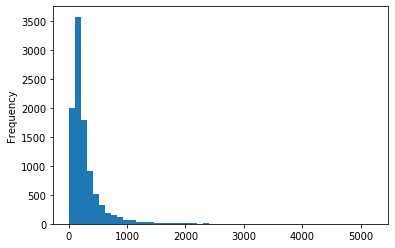

In [174]:
review['length'].plot(bins=50,kind='hist')

In [175]:
review['length'].describe()

count    9954.000000
mean      279.777979
std       338.615629
min         1.000000
25%       144.000000
50%       189.000000
75%       321.000000
max      5212.000000
Name: length, dtype: float64

In [176]:
review[review['length']==5212]['Review'].iloc[0]

'hyderabadi daawat as the name suggests has some authentic hyderabadi food which you get to eat in the functions here in hyderabad! ever been to a hyderabadi daawat before? no not the hotel we\'re talking about a function, well if you\'ve been to one then you definitely know how much a hyderabadi loves food and how much he spends on the menu! and here at hyderabadi daawat, the restaurant, you get the same splendid variety of dishes to enjoy! the hotel is very easy to locate! its on the main road...while coming from orr or gachibowli side it comes on the right side and if you\'re coming from miyapur side then it will be on your left! the restaurant has simple yet beautiful interiors, very calm and cozy place! they also have banquet hall and a conference hall and they also undertake catering orders for parties and functions! and after the "dastar" was set we sat down for the food and they first brought the yakhni shorba! shorba is nothing but the soup! yakhni shorba is a dish from kashmi

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B26E886C8>,
      dtype=object)

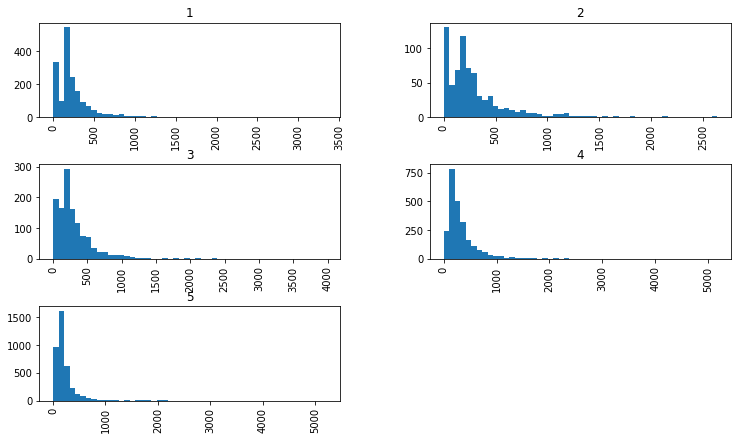

In [177]:
review.hist(column='length',by='Rating',bins=50,figsize=(12,7))

In [178]:
review.columns

Index(['Review', 'Rating', 'review', 'length'], dtype='object')

In [179]:
import string

In [180]:
from nltk.corpus import stopwords

In [181]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [182]:
def text_process(mess):
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [183]:
review.head()

Review  Rating  \
0  the ambience was good, food was quite good . h...       5   
1  ambience is too good for a pleasant evening. s...       5   
2  a must try.. great food great ambience. thnx f...       5   
3  soumen das and arun was a great guy. only beca...       5   
4  food is good.we ordered kodi drumsticks and ba...       5   

                                              review  length  
0  The ambience was good, food was quite good . h...     222  
1  Ambience is too good for a pleasant evening. S...     144  
2  A must try.. great food great ambience. Thnx f...     189  
3  Soumen das and Arun was a great guy. Only beca...     148  
4  Food is good.we ordered Kodi drumsticks and ba...     160

In [184]:
review['Review'].head().apply(text_process)

0    [ambience, good, food, quite, good, saturday, ...
1    [ambience, good, pleasant, evening, service, p...
2    [must, try, great, food, great, ambience, thnx...
3    [soumen, das, arun, great, guy, behavior, sinc...
4    [food, goodwe, ordered, kodi, drumsticks, bask...
Name: Review, dtype: object

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

In [186]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(review['Review'])

In [187]:
len(bow_transformer.vocabulary_)

19607

In [188]:
review_bow = bow_transformer.transform(review['Review'])

In [189]:
print('Shape of Sparse Matrix: ', review_bow.shape)
print('Amount of Non-Zero occurences: ', review_bow.nnz)

Shape of Sparse Matrix:  (9954, 19607)
Amount of Non-Zero occurences:  240965


In [190]:
sparsity = (100.0 * review_bow.nnz / (review_bow.shape[0] * review_bow.shape[1]))
sparsity

0.1234653753161416

In [191]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(review_bow)

In [192]:
review_tfidf = tfidf_transformer.transform(review_bow)
print(review_tfidf.shape)

(9954, 19607)


In [193]:
from sklearn.naive_bayes import MultinomialNB

In [194]:
rating_detect_model = MultinomialNB().fit(review_tfidf,review['Rating'])

In [195]:
predictions = rating_detect_model.predict(review_tfidf)
predictions

array([5, 5, 5, ..., 4, 4, 4], dtype=int64)

In [196]:
from sklearn.metrics import classification_report

In [197]:
print(classification_report(review['Rating'],predictions))

              precision    recall  f1-score   support

           1       0.82      0.77      0.80      1744
           2       0.00      0.00      0.00       703
           3       0.71      0.02      0.03      1239
           4       0.52      0.60      0.56      2442
           5       0.67      0.97      0.79      3826

    accuracy                           0.66      9954
   macro avg       0.55      0.47      0.44      9954
weighted avg       0.62      0.66      0.59      9954



D:\ram\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [198]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(review['Review'], review['Rating'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

7963 1991 9954


In [199]:
from sklearn.pipeline import Pipeline

In [200]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [201]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000018B27E781F8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [202]:
pred = pipeline.predict(msg_test)

In [203]:
print(classification_report(pred,label_test))

              precision    recall  f1-score   support

           1       0.61      0.81      0.70       270
           2       0.00      0.00      0.00         0
           3       0.01      0.75      0.02         4
           4       0.35      0.40      0.37       452
           5       0.93      0.55      0.69      1265

    accuracy                           0.55      1991
   macro avg       0.38      0.50      0.36      1991
weighted avg       0.75      0.55      0.62      1991



D:\ram\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [205]:
tree = DecisionTreeClassifier().fit(review_tfidf,review['Rating'])

In [206]:
tree_pred = tree.predict(review_tfidf)

In [207]:
print(classification_report(review['Rating'],tree_pred))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99      1744
           2       0.97      0.97      0.97       703
           3       0.98      0.97      0.98      1239
           4       1.00      0.96      0.98      2442
           5       0.97      1.00      0.98      3826

    accuracy                           0.98      9954
   macro avg       0.98      0.98      0.98      9954
weighted avg       0.98      0.98      0.98      9954



In [208]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [209]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000018B27E781F8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                       

In [210]:
tree_prediction = pipeline.predict(msg_test)

In [211]:
print(classification_report(tree_prediction,label_test))

              precision    recall  f1-score   support

           1       0.60      0.63      0.62       342
           2       0.10      0.12      0.11       105
           3       0.17      0.22      0.19       183
           4       0.36      0.40      0.38       467
           5       0.71      0.59      0.64       894

    accuracy                           0.50      1991
   macro avg       0.39      0.40      0.39      1991
weighted avg       0.53      0.50      0.51      1991



In [212]:
rfc = RandomForestClassifier().fit(review_tfidf,review['Rating'])

In [213]:
rfc_pred = rfc.predict(review_tfidf)

In [214]:
print(classification_report(review['Rating'],rfc_pred))

              precision    recall  f1-score   support

           1       0.99      0.98      0.99      1744
           2       0.97      0.96      0.97       703
           3       0.98      0.97      0.98      1239
           4       1.00      0.96      0.98      2442
           5       0.96      1.00      0.98      3826

    accuracy                           0.98      9954
   macro avg       0.98      0.98      0.98      9954
weighted avg       0.98      0.98      0.98      9954



In [215]:
pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [216]:
pipeline1.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000018B27E781F8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [217]:
rfc_predictions1 = pipeline1.predict(msg_test)

In [218]:
print(classification_report(rfc_predictions1,label_test))

              precision    recall  f1-score   support

           1       0.84      0.69      0.76       434
           2       0.03      0.50      0.06         8
           3       0.13      0.55      0.21        56
           4       0.38      0.50      0.44       393
           5       0.89      0.61      0.72      1100

    accuracy                           0.60      1991
   macro avg       0.45      0.57      0.44      1991
weighted avg       0.75      0.60      0.66      1991

